In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

mpl.rcParams['figure.figsize'] = (12,6)
mpl.rcParams['axes.grid'] = False

In [4]:
df = pd.read_csv('elctricity_consumption.csv')

In [5]:
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,1/1/2016,365,1423.5,219.0,247.73,31
1,2/1/2016,292,1138.8,175.2,234.11,31
2,3/1/2016,130,507.0,78.0,123.85,29
3,4/1/2016,117,456.3,70.2,111.22,29
4,5/1/2016,136,530.4,81.6,118.37,29


#### Converting the datetime string to datetime object

In [14]:
df = pd.read_csv('elctricity_consumption.csv', parse_dates = ['Bill_Date'], date_parser = lambda x:datetime.strptime(x, '%m/%d/%Y'),  keep_date_col=True )

In [15]:
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [16]:
print('Rows : ',df.shape[0])
print('Columns : ', df.shape[1])
print('\n Features  :\n', df.columns.tolist())

Rows :  53
Columns :  6

 Features  :
 ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']


In [17]:
df.isnull().any()

Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool

In [18]:
bill_df = df.set_index('Bill_Date')

In [19]:
bill_df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [21]:
bill_2018 = bill_df.loc['2016':'2018'][['Billed_amount']]

In [22]:
bill_2018

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


In [23]:
bill_2018['Rolling'] = bill_2018[['Billed_amount']].rolling(window=3).mean().shift(1)

In [24]:
bill_2018

,Billed_amount,Rolling
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


<AxesSubplot:xlabel='Bill_Date'>

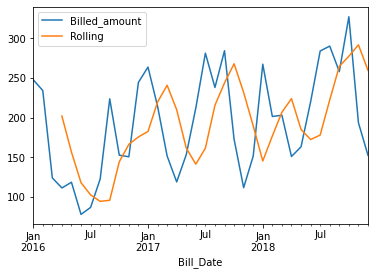

In [25]:
bill_2018.plot()

#### Weighted moving average

In [34]:
bill_2018['weighted'] = bill_2018['Billed_amount'].rolling(window=3).apply(lambda x: (x*np.array([0.5,1,1.5])).mean()).shift(1)

In [35]:
bill_2018

,Billed_amount,Rolling,weighted
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


<AxesSubplot:xlabel='Bill_Date'>

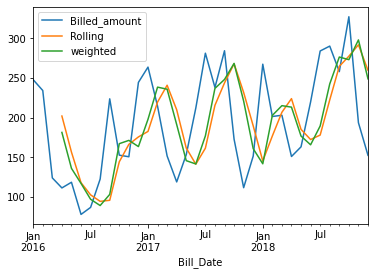

In [36]:
bill_2018.plot()

### Exponential moving average
- In weighted and exponential more weightage is given to current

In [38]:
bill_2018['Exp ma'] = bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods = 0).mean().shift(1)

In [39]:
bill_2018

,Billed_amount,Rolling,weighted,Exp ma
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000
2016-03-01,123.85,NaN,NaN,240.920000
2016-04-01,111.22,201.896667,181.250000,182.385000
2016-05-01,118.37,156.393333,135.911667,146.802500
2016-06-01,77.81,117.813333,116.900000,132.586250
2016-07-01,86.67,102.466667,96.898333,105.198125
2016-08-01,122.40,94.283333,89.000000,95.934063
2016-09-01,223.62,95.626667,103.058333,109.167031


<AxesSubplot:xlabel='Bill_Date'>

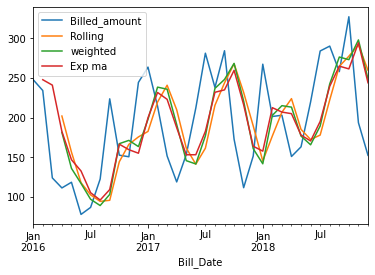

In [40]:
bill_2018.plot()

### Exponential Smoothning
- Larger alpha means more weightage given to the recent data

In [43]:
bill_2018['Exp_Smoth'] = bill_2018['Billed_amount'].ewm(alpha=0.7, adjust=False, min_periods = 0).mean().shift(1)

<AxesSubplot:xlabel='Bill_Date'>

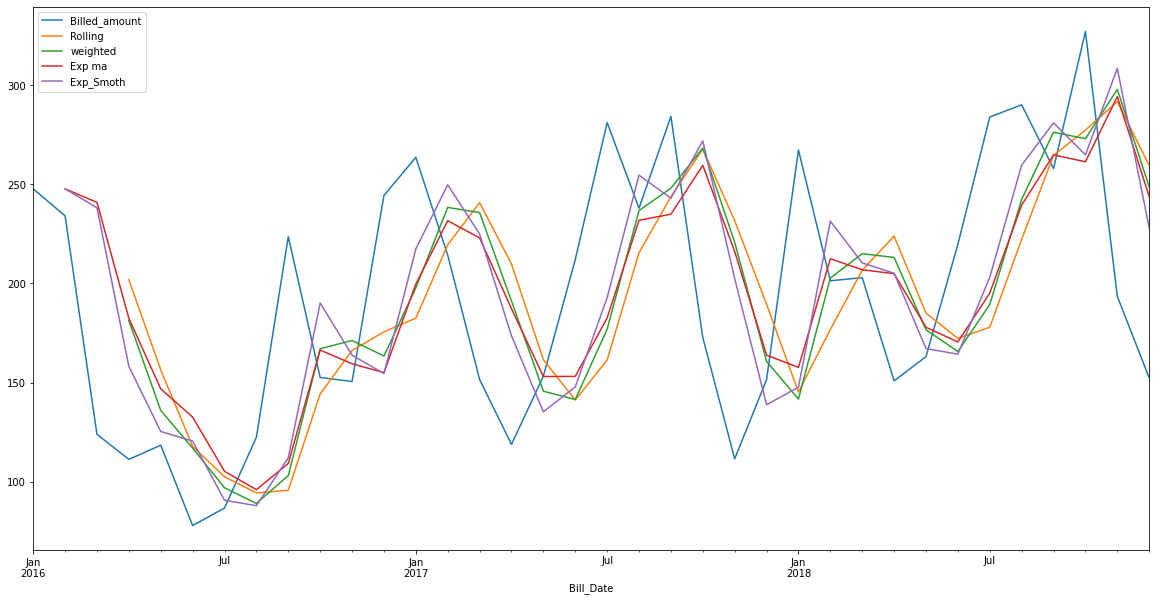

In [46]:
mpl.rcParams['figure.figsize'] = (20,10)
bill_2018.plot()